# Impurity Model for nEXO

This analysis focuses on studying the impact of electronegative impurities in certain environments. We will go through a series of calculations and visual representations to understand this phenomenon better. See Ako Jamil's thesis for reference.

In [1]:
# Load packages.
import elec_neg_functions as enf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Load the 3 files that contain all the information for the models.
import Library as Lib
import elec_neg_functions as enf
from RunModel import *

# Global Constants.
M_nEXO = 5000  # in kg, LXe mass in nEXO
p_LXe = 5.5e-3  # in kg/liter, LXe density
M_XPM = 1.53 # in Kg, LXe mass in the XPM
C_el = 300 # in ppb/μs, constant for the XPM fits
T_room = 293 # in Kelvin, room temperature
T_LXe = 164 # in Kelvin, LXe temperature

# Electron lifetime prediction



In [2]:
# Constants for this section
n0 = 1  # in ppb, initial impurity concentration
F = 200/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0  # purification efficiency
alpha = 0.3  # in ms, EXO-200 value, field dependant factor

num_seconds = 60*24*60*60  # total seconds in the number of days
seconds = np.arange(0, num_seconds+1)


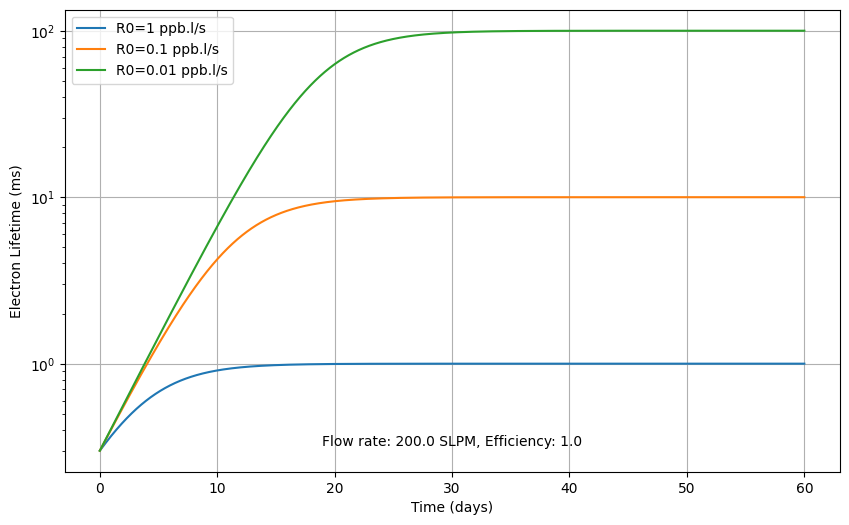

In [3]:
# Keeping N_p constant, but with multiple R0 values
n_p= 0.0  # in ppb, purifier output impurity concentration
R0_values = [1, 0.1, 0.01] # in ppb liter/sec, total out-diffusion rate

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
for R0 in R0_values:
    electron_lifetimes = [enf.electron_lifetime(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s')

# Configuring the plot's settings
#plt.title(f'Electron Lifetime Prediction in the nEXO Experiment (n_p={n_p})')
plt.xlabel('Time (days)')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')
plt.legend()
plt.text(0.5, 0.05, f'Flow rate: {F*60} SLPM, Efficiency: {eta}', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.grid(True)

plt.show()

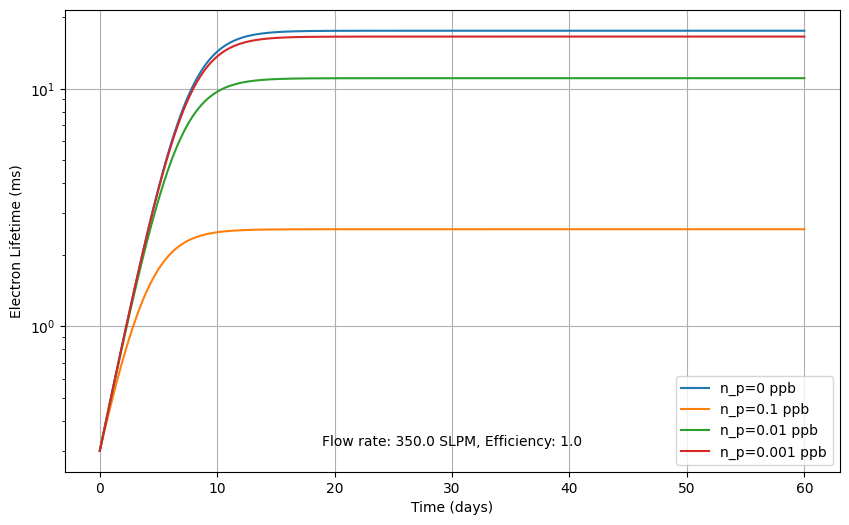

In [4]:
# This time keeping R0 constant, but with multiple n_p values
F = 350/60  # in liter/sec, xenon gas circulation flow rate
R0=0.1 # in ppb liter/sec, total out-diffusion rate
n_p_values = [0, 0.1, 0.01, 0.001] # in ppb, purifier output impurity concentration

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each n_p
for n_p in n_p_values:
    electron_lifetimes = [enf.electron_lifetime(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'n_p={n_p} ppb')

# Configuring the plot's settings
#plt.title(f'Electron Lifetime Prediction in the nEXO Experiment (R0={R0} ppb.l/s)')
plt.xlabel('Time (days)')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')
plt.legend()
plt.text(0.5, 0.05, f'Flow rate: {F*60} SLPM, Efficiency: {eta}', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.grid(True)

plt.show()

## XPM measurement fits

Fits for the measurements made by the Xenon Purity Monitor at SLAC.

### Re-alalyzing XPM Measurement

Data from "control3" (empty XPM) in April (run start 2-10-17). From P.C. Rowson et al., Xenon Purity Monitor at SLAC

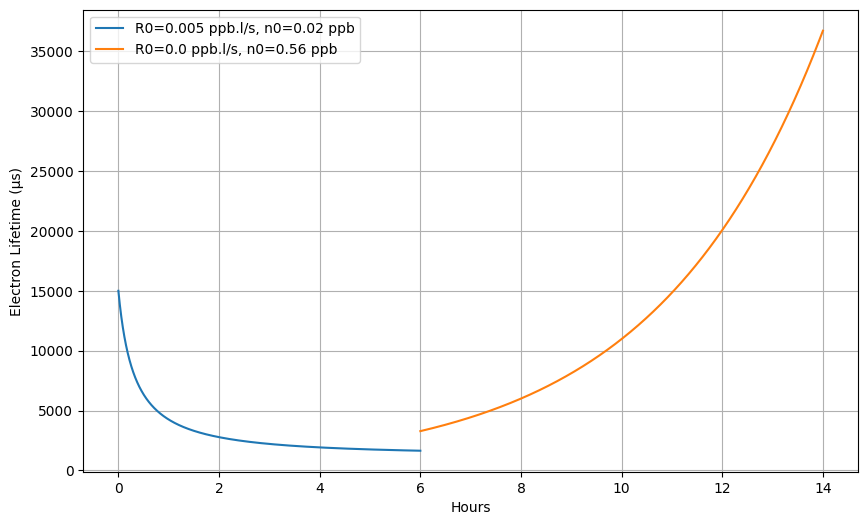

In [5]:
#Assuming
n_p= 0.0  # in ppb, purifier output impurity concentration
alpha = 0.3*1e3  # in μs, EXO-200 value, field dependant factor

#Given constants for first fit
F = 1.4/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0; eta_error=0.3  # purification efficiency
R0 = 5.0e-3; R0_error=1.0e-3 # in ppb liter/sec, total out-diffusion rate
n0 = 0.02; n0_error=0.02  # in ppb, initial impurity concentration
seconds = np.arange(0, 6*60*60+1)
seconds= np.arange(0, 6*60*60+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.electron_lifetime(sec, M_XPM, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]
plt.plot(seconds / (60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s, n0={n0} ppb')

#--------------------------------------------------------------------------------------------------------------------------------

# Given constants for second fit
R0 = 0.0e-4; R0_error=7.4e-4 # in ppb liter/sec, total out-diffusion rate
n0 = 0.56; n0_errors=0.12  # in ppb, initial impurity concentration
seconds = np.arange(6*60*60+1, 14*60*60+1)

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.electron_lifetime(sec, M_XPM, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]
plt.plot(seconds / (60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s, n0={n0} ppb')

# Configuring the plot's settings
#plt.title('XPM Measurement for "control3"')
plt.xlabel('Hours')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

Results might be different here than the ones shown on the data fits becauses of the assumed values of alpha and n_p for the XPM. When the data will be available, a fit function will be added, to do this correctly.

### Exemple with Torlon

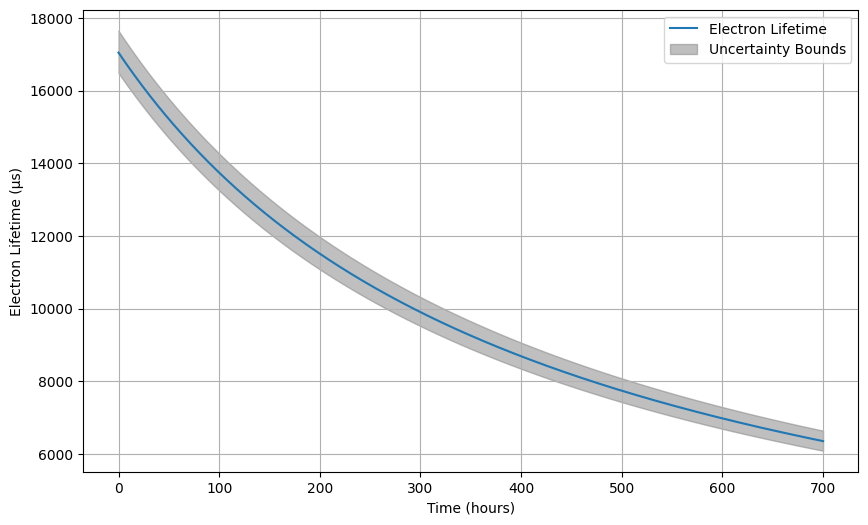

In [6]:
# Constants
n0=0.0176; n0_error=6e-4
R0=3.27e-6; R0_error=0.16e-6
second = np.arange(0, (700*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
#plt.title('XPM data fit for a Torlon sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

### Exemple with Ultem.

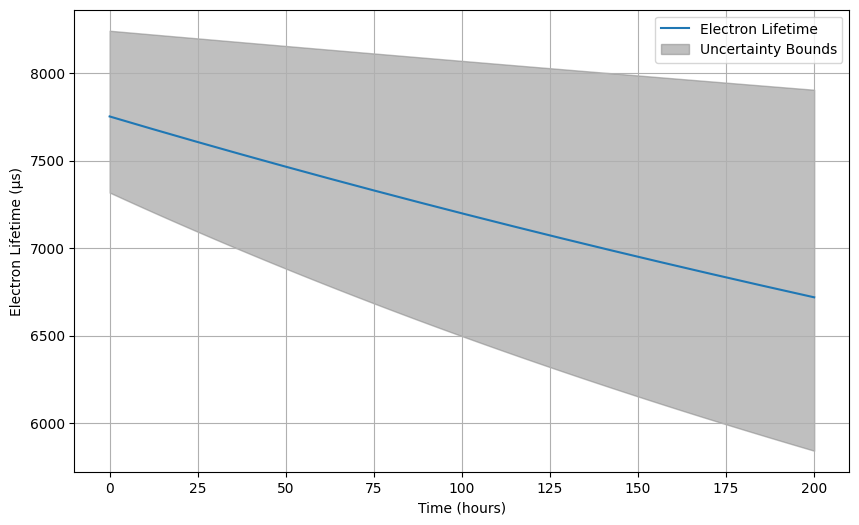

In [7]:
# Constants
n0=0.0387; n0_error=2.3e-3
R0=2.3e-6; R0_error=1.7e-6
second = np.arange(0, (200*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds, then plot
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting the main line
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
#plt.title('XPM data fit for a Ultem sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

# Modelling outgassing of impurities


### Desorption from Stainless Steel

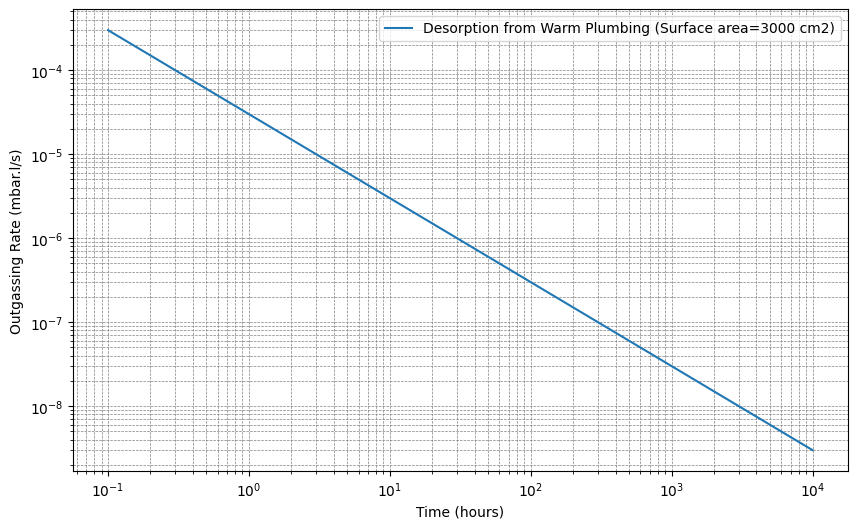

In [8]:
# Constant
tau0=1e-13 # in sec, residence time of an impurity
area=3000 #in cm2, area of the sample
J=1e-8 # in mbar.L.s-1.cm-1, outgassing rate of H2O from an unbaked stainless steel surface that has been pumped on for 1h
t = np.arange(1e-1*60*60, (1e4*60*60)+1, 60) # in seconds
t0=1*60*60 # constant value from Ako Jamil's thesis page 89

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate outgassing rate
J_total = J * area * t0/t

# Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
plt.plot(t / (60*60), J_total, label=f'Desorption from Warm Plumbing (Surface area={area} cm2)')

# Configuring the plot's settings
#plt.title(f'Outgassing rate of mono-layers of impurities on stainless steel walls as a function of pumping time in EXO-200')
plt.xlabel('Time (hours)')
plt.ylabel('Outgassing Rate (mbar.l/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')

plt.show()

### Outgassing from plastics

In [9]:
# Constants from p9 to 12 in "Outgassing model for electronegative impurities" (except height, given by andrea for exo200)
C0 = 943 / 1e9  # Initial oxygen concentration in PTFE (ppb)
D0 = 31.4 / 1e8 # Diffusion constant at infinite temperature (cm^2/s)
EA = 0.17 * 1.602176634e-19  # Activation energy (Joules)
D = 0.15  # Thickness of PTFE (cm)
RADIUS = 18.3  # Radius of the material (cm)
HEIGHT = 40  # Height of the material (cm)

# Surface area calculation
surface_area = 2 * np.pi * RADIUS * HEIGHT  # Surface area of contact (cm^2)

# Time arrays (incremented every hour)
t_short = np.arange(0, (2 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t_long = np.arange((2 * 24 * 60 * 60) + 1, (20 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t = np.arange(0, (20 * 24 * 60 * 60) + 1, 60 * 60) # seconds

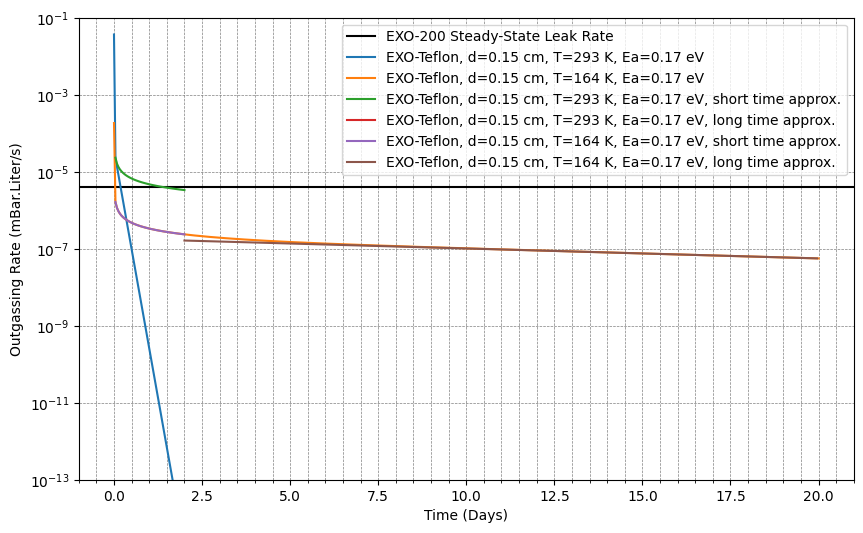

In [11]:
# Calculate outgassing rates using the optimized function
outgassing_rate_recirculated = [enf.plastics_outgassing(C0, D0, EA, T_room, D, sec, surface_area) for sec in t]
outgassing_rate_cold = [enf.plastics_outgassing(C0, D0, EA, T_LXe, D, sec, surface_area) for sec in t]

outgassing_rate_recirculated_approx = [enf.plastics_outgassing_approximation(C0, D0, EA, T_room, sec, D, surface_area, 'short') for sec in t_short]
outgassing_rate_recirculated_approxlong = [enf.plastics_outgassing_approximation(C0, D0, EA, T_room, sec, D, surface_area, 'long') for sec in t_long]

outgassing_rate_cold_approx = [enf.plastics_outgassing_approximation(C0, D0, EA, T_LXe, sec, D, surface_area, 'short') for sec in t_short]
outgassing_rate_cold_approxlong = [enf.plastics_outgassing_approximation(C0, D0, EA, T_LXe, sec, D, surface_area, 'long') for sec in t_long]

# Plotting
plt.figure(figsize=(10, 6))
plt.axhline(y=4e-6, color='black', linestyle='-', label="EXO-200 Steady-State Leak Rate")  # Adds a horizontal line across the axis at y = 4*10^-6
plt.plot(t / (24 * 60 * 60), outgassing_rate_recirculated, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV')
plt.plot(t / (24 * 60 * 60), outgassing_rate_cold, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV')

plt.plot(t_short / (24 * 60 * 60), outgassing_rate_recirculated_approx, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV, short time approx.')
plt.plot(t_long / (24 * 60 * 60), outgassing_rate_recirculated_approxlong, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV, long time approx.')

plt.plot(t_short / (24 * 60 * 60), outgassing_rate_cold_approx, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV, short time approx.')
plt.plot(t_long / (24 * 60 * 60), outgassing_rate_cold_approxlong, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV, long time approx.')

#plt.title('Outgassing Rate Over Time for EXO-200\'s PTFE (40 cm Height & 18.3 cm Radius Cylinder)')
plt.xlabel('Time (Days)')
plt.ylabel('Outgassing Rate (mBar.Liter/s)')
plt.yscale('log')
plt.legend()
plt.ylim(1e-13, 1e-1)
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.show()


Doing tests to compare from Ako's notebook.

In [12]:
# Constants from p9 to 12 in "Outgassing model for electronegative impurities" (except height, given by andrea for exo200)
C0 = 8.607319875e+20  # Initial oxygen concentration in PTFE (cm-3)
D0 = 3.14e-07 # Diffusion constant at infinite temperature (cm^2/s)
EA = 0.17 * 1.602176634e-19  # Activation energy (Joules)
D = 0.15  # Thickness of PTFE (cm)
surface_area = 9200  # Surface area of contact (cm^2)

# Time arrays (incremented every hour)
t_short = np.arange(0, (2 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t_long = np.arange((2 * 24 * 60 * 60) + 1, (20 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t = np.arange(0, (20 * 24 * 60 * 60) + 1, 60 * 60) # seconds

3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.129200801404997e-07
3.12920080

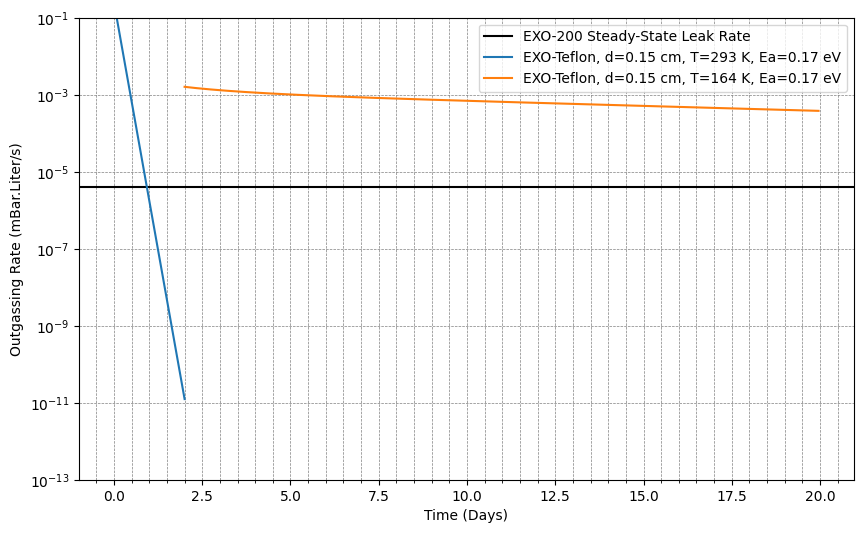

In [13]:
# Calculate outgassing rates using the optimized function
outgassing_rate_recirculated = [enf.plastics_outgassing_tests(C0, D0, EA, T_room, D, sec, surface_area) for sec in t_short]
outgassing_rate_cold = [enf.plastics_outgassing_tests(C0, D0, EA, T_LXe, D, sec, surface_area) for sec in t_long]

# Plotting
plt.figure(figsize=(10, 6))
plt.axhline(y=4e-6, color='black', linestyle='-', label="EXO-200 Steady-State Leak Rate")  # Adds a horizontal line across the axis at y = 4*10^-6
plt.plot(t_short / (24 * 60 * 60), outgassing_rate_recirculated, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV')
plt.plot(t_long / (24 * 60 * 60), outgassing_rate_cold, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV')

#plt.title('Outgassing Rate Over Time for EXO-200\'s PTFE (40 cm Height & 18.3 cm Radius Cylinder)')
plt.xlabel('Time (Days)')
plt.ylabel('Outgassing Rate (mBar.Liter/s)')
plt.yscale('log')
plt.legend()
plt.ylim(1e-13, 1e-1)
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.show()


#### Using System
The class `System` will load the necessary information from `Library.py` by defining 4 key parameters: The name of the system (`Setup`), the material inside that setup that is outgassing (`Material`), the gas species that is dissolved inside the material (`Solute`) and the dimension of that piece of material (`Version`). 
In this example we want to plot the outgassing of oxygen from the piece of EXO-200 Teflon that we have at Yale.

We then define the temperatures we want to test at, and their respective time regions. The first element of `Points` is always 0, followed by the end of the first region and then the end of the second region. This example code will give you $\frac{100-0}{0.1}$ points from 0 to 100 and $\frac{200-100}{0.1}$ points from 100 to 200.

In [14]:
S1 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='EXO-Teflon')
S1.Print()

# Define the temperatures, Should always be of type list. 
Temperature = [295, 310]
S1.Temp = Temperature

# Set time regions for the above defined temperature values.
S1.Time = GetTimeStamps(Points=[0,100,200], Spacing=0.1, TimeScale='Hours')

Name: YLXPS
 Material: Teflon
 Solute: Oxygen
 Version: EXO-Teflon
 Constraints: []
 ConstraintIndex: []
 Diffusion: 3.14e-07
 Solubility: 0.22
 ActivationEnergy: 0.17
 Abundance: 0.21
 MolarMass: 32
 XeMass: 2170
 Volume: 0.0053
 Area: 390.32180000000005
 Thickness: 0.15


Calculate outgassing by first getting the diffusion constants for the above defined temperatures using the Arrhenius equation, then getting the initial number of impurities from model parameters (in total number of impurities `'#'`, or ratio between number of impurities and number of xenon atoms in the setup `'ppm','ppb','ppt'` or total mass of impurities `'Mass'`).

The number of impurities is finally calculated using the solution to the diffusion equation, and the outgassing rate using Fick's 1st law.

In [15]:
# Calculate diffusion constants and initial impurities.
S1.DiffConstants = enf.get_diff_temp(S1, temperatures=S1.Temp)
S1.InitialImpurities = enf.get_initial_impurities(S1, units='#')

# Define the labels for the plot (name of the setup, temperature, thickness of the material.
S1.Labels = ['%s, d = %s cm, T = %d K' % (S1.Version, S1.Thickness, 295), '%s, d = %s cm, T = %d K' % (S1.Version, S1.Thickness, 310)]

# Calculate the number of impurities left in the sample as a function of time.
S1.Impurities = enf.get_impurities_vs_time(data=S1, time_scale='Hours')
impurities = S1.Impurities

# Calculate the outgassing rate as a function of time.
S1.FlowRate = enf.get_flow_rate_vs_time(data=S1, units='mBar Liter', time_scale='Hours')

Plotting the number of impurities left in the material and the expected outgassing rate. Display parameters can be changed afterward if needed.

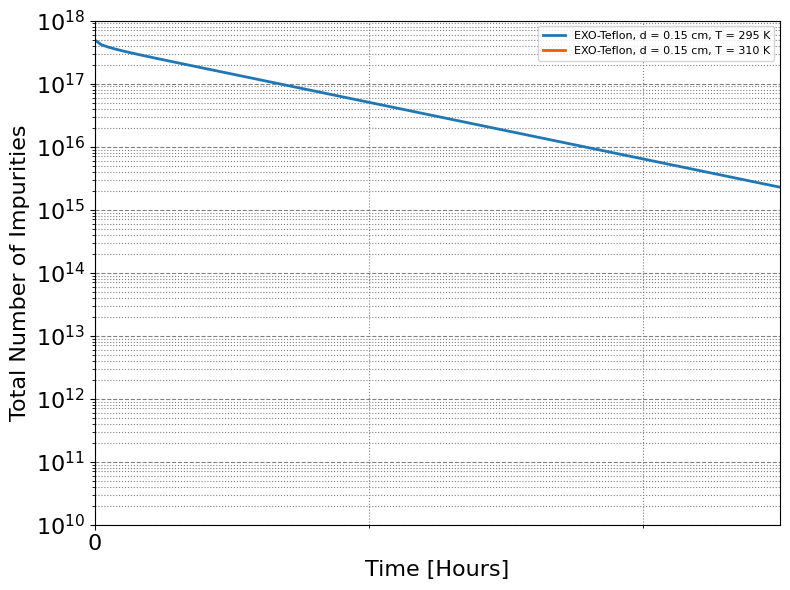

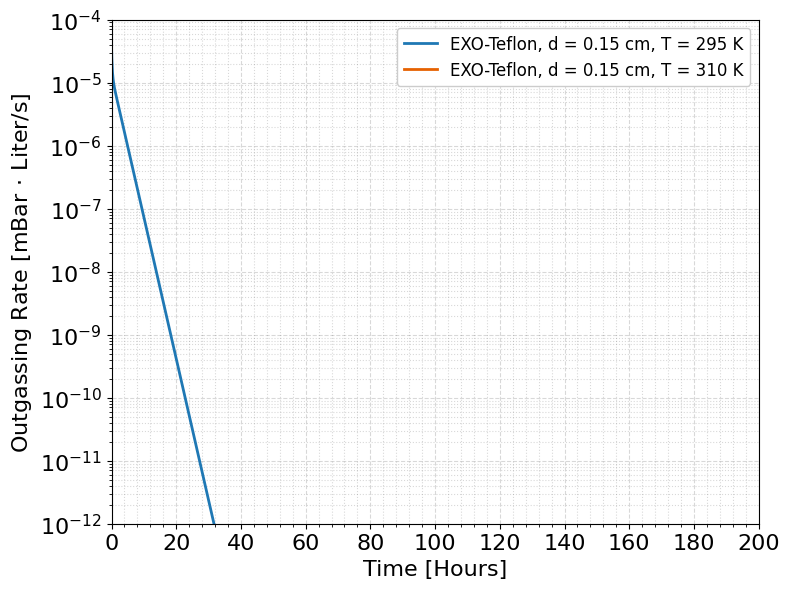

In [16]:
PlotImpuritiesVsTime([S1])
PlotFlowRateVsTime([S1])

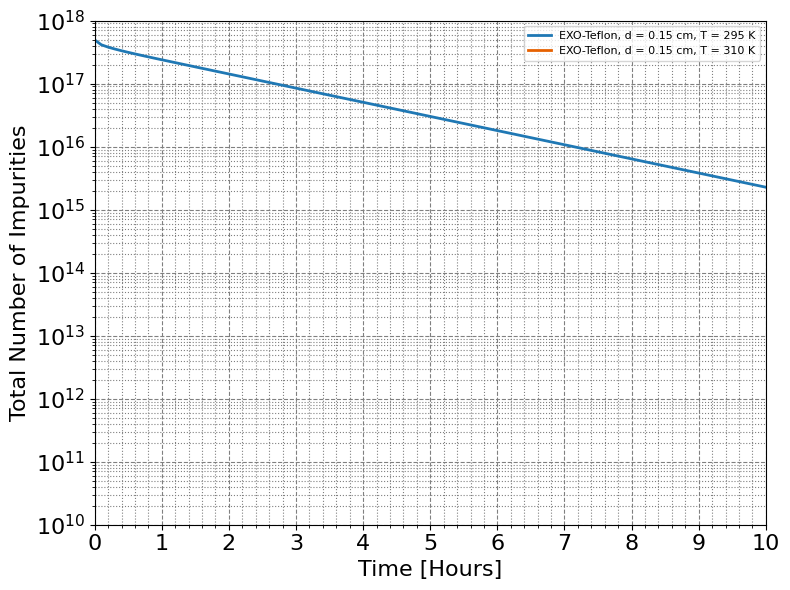

In [17]:
# Changing ranges, and ticks (here display 0 to 10 hours with ticks every 1 hour).
PlotImpuritiesVsTime([S1], XRange=[0,10], XTicks=1)

It is also possible to run modelling for multiple setups together by creating an instance of the System class for each setup.

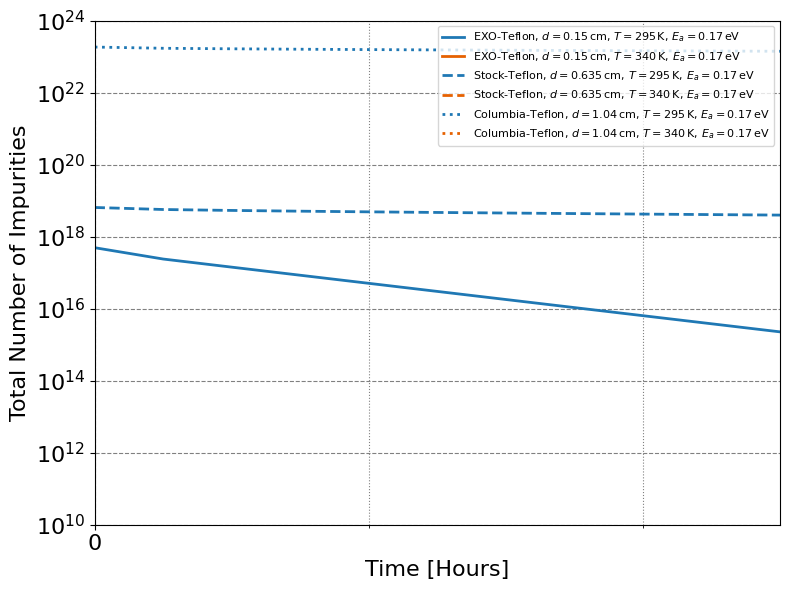

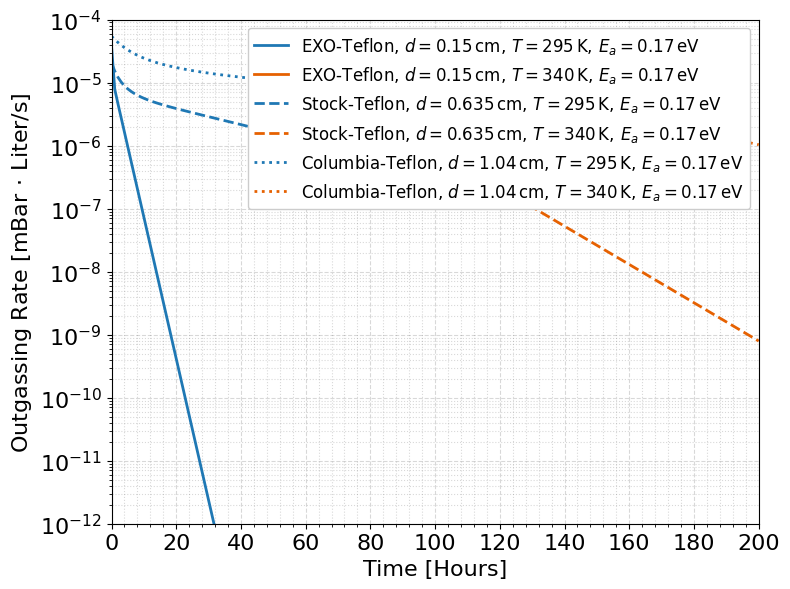

In [18]:
# Creating instances for each setup
S1 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='EXO-Teflon')
S2 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='Stock-Teflon')
S3 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='Columbia-Teflon')

# Combining into one list
Systems = [S1,S2,S3]

# Defining temperatures, time ranges, and automatic labels
Temperature = [295, 340]
Time = GetTimeStamps(Points=[0,100,200], Spacing=1, TimeScale='Hours')
Labels = GetLabels(Systems, Temperature)

# Running the modelling to get the number of impurities and outgassing rates together.
DoModelling(Systems, Labels, Temperature, Time, TimeScale='Hours')

# Plotting impurities and outgassing rates.
PlotImpuritiesVsTime(Systems)
PlotFlowRateVsTime(Systems)